# Week 5: Building a Variational Monte Carlo Program

## Basic Quantum Monte Carlo

* The variational principle
    * Given a hamiltonian, $H$, and trial wave function $\Psi_T(\mathbf{R};\mathbf{\alpha})$
    * The expectation value of $\mathcal{E}[\mathcal{H}]$
    $$\mathcal{E}[\mathcal{H}]=\frac{\int \lceil \mathcal{R}\ominus_{\mathcal{T}}^*(\mathcal{R;\mathbf{\alpha}})\mathcal{H}(\mathcal{R})\ominus_\mathcal{T}(\mathcal{R;\mathbf{\alpha}})}{\int \lceil \mathcal{R}\ominus_{\mathcal{T}}^*(\mathcal{R;\mathbf{\alpha}})\ominus_\mathcal{T}(\mathcal{R;\mathbf{\alpha}})}$$
        is an upper bound to the ground state energy $E_0$ of the hamiltonian $H$
    * In other words, $E_0 \leq \mathcal{E}[\mathcal{H}]$
* The trial wave function can be expanded in the eigenstates $\Psi_i(\mathbf{R})$ of the hamiltonian
    $$\Psi_T(\mathbf{R};\mathbf{\alpha}) = \sum_i a_i\Psi_i(\mathbf{R})$$
    and assuming the set of eigenfunctions are normalized, we get
    $$\frac{\sum_n a_n^2E_n}{\sum_na_n^2} \geq E_0$$
* The variational principle yields the lowest energy of states with a given symmetry
* The time consuming part of VMC is the search for the variational minimum
* Need good knowledge of the system to carry out reasonable VMC calculations
* This is not always the case, but then VMC can be used as a starting point for diffusion Monte Carlo (DMC) (requires a good guess on the binding energy and its wave function, which we can get from VMC?)

### Procedure of VMC
1. Construct a trial wave function $\psi_T(\mathbf{R};\mathbf{\alpha})$, where $\mathbf{R}$ contains the positions of $n$ particles and $\mathbf{\alpha}$ contains $M$ variational parameters
2. Then calculate the expectation value of the hamiltonian, $H$
    $$\bar{E}[\mathbf{\alpha}]=\frac{\int d\mathbf{R}\Psi_{T}^*(\mathbf{R};\mathbf{\alpha})H(\mathbf{R})\Psi_T(\mathbf{R};\mathbf{\alpha})}{\int d \mathbf{R}\Psi_T^*(\mathbf{R};\mathbf{\alpha})\Psi_T(\mathbf{R};\mathbf{\alpha})}$$
3. Vary $\mathbf{\alpha}$ with minimization algorithm and return to the first step if we are not satisfied with the results

#### Introducing standard statistical expressions for expectation values
* Probability density function (PDF) for the trial wave function
    $$P(\mathbf{R}) = \frac{|\psi_T(\mathbf{R};\mathbf{\alpha})|^2}{\int |\psi_T(\mathbf{R};\mathbf{\alpha})|^2 d\mathbf{R}}$$
* We define the local energy as
    $$E_L(\mathbf{R};\mathbf{\alpha}) = \frac{1}{\psi_T(\mathbf{R};\mathbf{\alpha})}H\psi_T(\mathbf{R};\mathbf{\alpha})$$
* We combine the PDF and the local energy
    $$\bar{E}[\mathbf{\alpha}] = \int P(\mathbf{R})E_L(\mathbf{R};\mathbf{\alpha})d\mathbf{R}\approx \frac{1}{N}\sum_{i=1}^NE_L(\mathbf{R};\mathbf{\alpha})$$
    where $N$ is the number of Monte Carlo samples
    

The algorithm
1. Initialization: Fix the number of MC steps, choose initial $\mathbf{R}$ and variational parameters $\mathbf{\alpha}$ and calculate $|\psi_T(\mathbf{R})|^2$
2. Initialize the energy and the variance and start the MC calculation
    * calculate a trial position, $\mathbf{R}_p = \mathbf{R}+r*step$ where $r$ is a random number between 0 and 1
    * Metropolis algorithm to accept or reject move $w = P(\mathbf{R}_p)/P(\mathbf{R})$
    * if accepted $\rightarrow$ $\mathbf{R} = \mathbf{R}_p$
    * update averages
3. Finish and compute final averages

* $step$ is often referred to as the brute-force sampling and is ofthen replaced by "importance sampling"
* Having analytical local energies saves us from computing numericllythe second derivative and speeds up the process by a factor 3 or more

#### Example: 1D harmonic oscillator

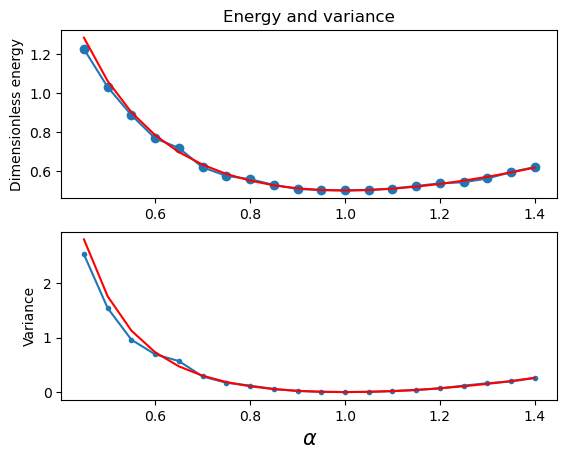

    Alpha    Energy  Exact Energy  Variance  Exact Variance
0    0.45  1.227103      1.285193  2.526963        2.803442
1    0.50  1.031317      1.062500  1.541446        1.757812
2    0.55  0.887865      0.902071  0.961478        1.127465
3    0.60  0.768036      0.784444  0.692754        0.730706
4    0.65  0.718395      0.697341  0.569756        0.472569
5    0.70  0.618957      0.632704  0.287050        0.300629
6    0.75  0.575327      0.585069  0.171208        0.184613
7    0.80  0.558100      0.550625  0.119355        0.106376
8    0.85  0.528459      0.526646  0.056645        0.054712
9    0.90  0.507796      0.511142  0.021255        0.022532
10   0.95  0.502108      0.502633  0.005172        0.005280
11   1.00  0.500000      0.500000  0.000000        0.000000
12   1.05  0.502823      0.502382  0.004644        0.004776
13   1.10  0.510110      0.509112  0.017654        0.018389
14   1.15  0.523033      0.519661  0.036982        0.040095
15   1.20  0.536847      0.533611  0.068

In [4]:
# VMC for the one-dimensional harmonic oscillator
# Brute force Metropolis, no importance sampling and no energy minimization
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from decimal import *

# Trial wave function for the Harmonic oscillator in one dimension
def WaveFunction(r,alpha):
    return exp(-0.5*alpha*alpha*r*r)

# Local energy for the Harmonic oscillator in one dimension
def LocalEnergy(r,alpha):
    return 0.5*r*r*(1-alpha**4) + 0.5*alpha*alpha

# The Monte Carlo sampling with the Metropolis algo
def MonteCarloSampling():
    NumberMCcycles= 100000
    StepSize = 1.0
    # positions
    PositionOld = 0.0
    PositionNew = 0.0
    # seed for rng generator
    seed()
    # start variational parameter
    7
    alpha = 0.4
    for ia in range(MaxVariations):
        alpha += .05
        AlphaValues[ia] = alpha
        energy = energy2 = 0.0
        #Initial position
        PositionOld = StepSize * (random() - .5)
        wfold = WaveFunction(PositionOld,alpha)
        #Loop over MC MCcycles
        for MCcycle in range(NumberMCcycles):
            #Trial position
            PositionNew = PositionOld + StepSize*(random() - .5)
            wfnew = WaveFunction(PositionNew,alpha)
            #Metropolis test to see whether we accept the move
            if random() <= wfnew**2 / wfold**2:
                PositionOld = PositionNew
                wfold = wfnew
            DeltaE = LocalEnergy(PositionOld,alpha)
            energy += DeltaE
            energy2 += DeltaE**2
        #We calculate mean, variance and error
        energy /= NumberMCcycles
        energy2 /= NumberMCcycles
        variance = energy2 - energy**2
        error = sqrt(variance/NumberMCcycles)
        Energies[ia] = energy
        Variances[ia] = variance
        #outfile.write('%f %f %f %f \n' %(alpha,energy,variance,error))
    return Energies, AlphaValues, Variances

#Here starts the main program with variable declarations
MaxVariations = 20
Energies = np.zeros((MaxVariations))
ExactEnergies = np.zeros((MaxVariations))
ExactVariance = np.zeros((MaxVariations))
Variances = np.zeros((MaxVariations))
AlphaValues = np.zeros(MaxVariations)
(Energies, AlphaValues, Variances) = MonteCarloSampling()
#outfile.close()
ExactEnergies = 0.25*(AlphaValues*AlphaValues+1.0/(AlphaValues*AlphaValues))
ExactVariance = 0.25*(1.0+((1.0-AlphaValues**4)**2)*3.0/(4*(AlphaValues**4)))-ExactEnergies*ExactEnergies
#simple subplot
plt.subplot(2, 1, 1)
plt.plot(AlphaValues, Energies, 'o-',AlphaValues, ExactEnergies,'r-')
plt.title('Energy and variance')
plt.ylabel('Dimensionless energy')
plt.subplot(2, 1, 2)
plt.plot(AlphaValues, Variances, '.-',AlphaValues, ExactVariance,'r-')
plt.xlabel(r'$\alpha$', fontsize=15)
plt.ylabel('Variance')
#save_fig("VMCHarmonic")
plt.show()


#nice printout with Pandas
import pandas as pd
from pandas import DataFrame
data ={'Alpha':AlphaValues, 'Energy':Energies,'Exact Energy':ExactEnergies,'Variance':Variances,'Exact Variance':ExactVariance,}
frame = pd.DataFrame(data)
print(frame)


## The Metropolis algorithm

* A method to sample a normalized probability distribution by a stochastic process
* We define $\mathbf{P}_i^{(n)}$ to be the probability of finding the system in the state $i$ at step $n$
* The algorithm is:
    1. sample a possible new state $j$ with some probability $T_{i\rightarrow j}$
    2. accept the new state $j$ with probability $A_{i\rightarrow j}$ and use it as the next sample if the move is accepted
* $T$ and $A$ should be such that the $\mathbf{P}_i^{(n\rightarrow \infty)}\rightarrow p_i$ (approaching the true probability)
* By some fancy math and a balance requirement we get this relation between the probabilities
    $$\frac{A_{j\rightarrow i}}{A_{i\rightarrow j}} = \frac{p_iT_{i\rightarrow j}}{p_jT_{j\rightarrow i}}$$
    and the Metroplolis choice is to maximize the $A$ values by defining
    $$A_{j\rightarrow i} = \mathrm{min}\Big(1, \frac{p_iT_{i\rightarrow j}}{p_jT_{j\rightarrow i}}\Big)$$
* Having chosen the acceptance probabilities, we ensure that if $\mathbf{P}_i^{(n)}$ has equilibrated (equals $p_i$), it stays equilibrated
* The Metropolis method is the power method for computing the right eigenvector of $M$ with the largest magnitude eigenvalue
* For the method to converge we need to show that $M$ has only one eigenvalue of this magnitude and all other eigenvalues are smaller

### Example: two particles in HO in 2D

* The hamiltonian of a quantum dot is $\hat{H} = \hat{H}_0 + \hat{V}$, where $\hat{H}_0$ is for many-body HO and $\hat{V}$ is for Coulomb interactions
    $$\hat{V} = \sum_{i<j}^N\frac{1}{r}, \quad \hat{H}_r = -\nabla^2_r+\tfrac{1}{4}\omega^2r^2+\tfrac{1}{r}, \quad r=\sqrt{\mathbf{r}^2_i-\mathbf{r}^2_j}$$
* The trial wave function is on the form
    $$\psi_T(\mathbf{r}_1, \mathbf{r}_2) = Ce^{-\alpha_1\omega(r_1^2+r_2^2)/2}e^{r_{12}/(1+\alpha_2r_{12})}$$
    $r_{12}$ is the distance between the particles
* The local energy when $r_{12}$ goes towards zero
    $$\lim_{r_{12}\rightarrow 0}E_L(R) = \frac{1}{\mathcal{R}_t(r_{12})}\Big( 2\frac{d^2}{dr^2_{ij}} + \frac{4}{r_{ij}}\frac{d}{dr_{ij}}+ \frac{2}{r_{ij}}-\frac{l(l+1)}{r^2_{ij}}+2E \Big)\mathcal{R}_T(r_{12}) = 0$$
* Set $l=0$ to get the cusp condition
    $$\frac{d\mathcal{R}_T(r_{12})}{dr_{12}} = -\frac{1}{2(l+1)}\mathcal{R}_T(r_{12}), \quad r_{12}\rightarrow 0$$

In [1]:
# 2-electron VMC for quantum dot system in two dimensions
# Brute force Metropolis, no importance sampling and no energy minimization
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
# Trial wave function for the 2-electron quantum dot in two dims
def WaveFunction(r,alpha,beta):
    r1 = r[0,0]**2 + r[0,1]**2
    r2 = r[1,0]**2 + r[1,1]**2
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = r12/(1+beta*r12)
    return exp(-0.5*alpha*(r1+r2)+deno)
# Local energy for the 2-electron quantum dot in two dims, using analytical local energy
def LocalEnergy(r,alpha,beta):
    r1 = (r[0,0]**2 + r[0,1]**2)
    r2 = (r[1,0]**2 + r[1,1]**2)
    r12 = sqrt((r[0,0]-r[1,0])**2 + (r[0,1]-r[1,1])**2)
    deno = 1.0/(1+beta*r12)
    deno2 = deno*deno
    return 0.5*(1-alpha*alpha)*(r1 + r2) +2.0*alpha + 1.0/r12+deno2*(alpha*r12-deno2+2*beta*deno-1.0/r12)

# The Monte Carlo sampling with the Metropolis algo
def MonteCarloSampling():

    NumberMCcycles= 100000
    StepSize = 1.0
    # positions
    PositionOld = np.zeros((NumberParticles,Dimension), np.double)
    PositionNew = np.zeros((NumberParticles,Dimension), np.double)
    # seed for rng generator
    seed()
    # start variational parameter
    alpha = 0.9
    for ia in range(MaxVariations):
        alpha += .025
        AlphaValues[ia] = alpha
        beta = 0.2 
        for jb in range(MaxVariations):
            beta += .01
            BetaValues[jb] = beta
            energy = energy2 = 0.0
            DeltaE = 0.0
            #Initial position
            for i in range(NumberParticles):
                for j in range(Dimension):
                    PositionOld[i,j] = StepSize * (random() - .5)
            wfold = WaveFunction(PositionOld,alpha,beta)

            #Loop over MC MCcycles
            for MCcycle in range(NumberMCcycles):
                #Trial position
                for i in range(NumberParticles):
                    for j in range(Dimension):
                        PositionNew[i,j] = PositionOld[i,j] + StepSize * (random() - .5)
                wfnew = WaveFunction(PositionNew,alpha,beta)

                #Metropolis test to see whether we accept the move
                if random() < wfnew**2 / wfold**2:
                    PositionOld = PositionNew.copy()
                    wfold = wfnew
                    DeltaE = LocalEnergy(PositionOld,alpha,beta)
                energy += DeltaE
                energy2 += DeltaE**2

            #We calculate mean, variance and error ...
            energy /= NumberMCcycles
            energy2 /= NumberMCcycles
            variance = energy2 - energy**2
            error = sqrt(variance/NumberMCcycles)
            Energies[ia,jb] = energy    
    return Energies, AlphaValues, BetaValues


#Here starts the main program with variable declarations
NumberParticles = 2
Dimension = 2
MaxVariations = 10
Energies = np.zeros((MaxVariations,MaxVariations))
AlphaValues = np.zeros(MaxVariations)
BetaValues = np.zeros(MaxVariations)
(Energies, AlphaValues, BetaValues) = MonteCarloSampling()

print('done')

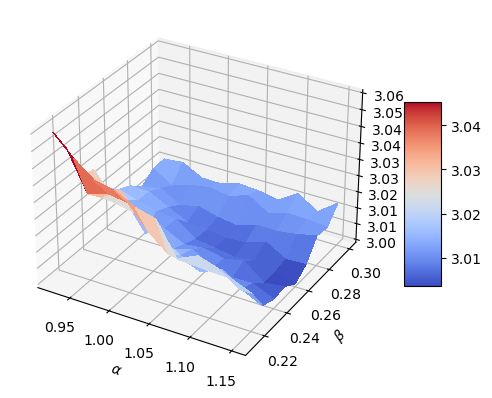

In [2]:
# Prepare for plots
fig = plt.figure()
ax = plt.axes(projection ='3d')
# Plot the surface.
X, Y = np.meshgrid(AlphaValues, BetaValues)
surf = ax.plot_surface(X, Y, Energies,cmap=cm.coolwarm,linewidth=0, antialiased=False)
# Customize the z axis.
zmin = np.matrix(Energies).min()
zmax = np.matrix(Energies).max()
ax.set_zlim(zmin, zmax)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')
ax.set_zlabel(r'$\langle E \rangle$')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()